<a href="https://colab.research.google.com/github/AlbertMdz/Redes-Neuronales-Avanzadas/blob/master/figuras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image,ImageOps,ImageEnhance
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters

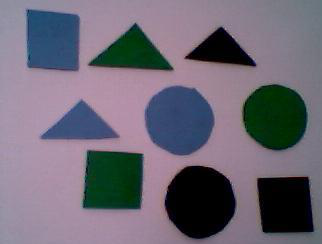

In [9]:
figuras = os.path.join('foto.jpg')
figs_orig = Image.open(figuras)
figs_orig

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


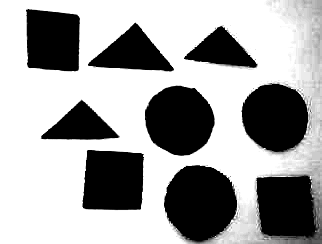

In [14]:
figs_grayscale = ImageOps.grayscale(figs_orig)
figs_grayscale = ImageEnhance.Contrast(figs_grayscale).enhance(8)
figs_grayscale

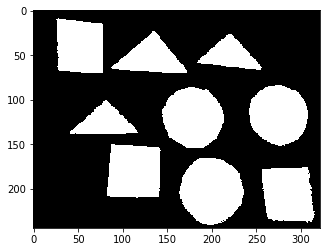

In [15]:
def umbral_image(img):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>25:
                z[i,j]=255
    return z

fig_arr = np.array(figs_grayscale)
fig_bin = umbral_image(fig_arr)
ICD=ski.util.invert(fig_bin)
plt.imshow(ICD,cmap='gray')
plt.show()

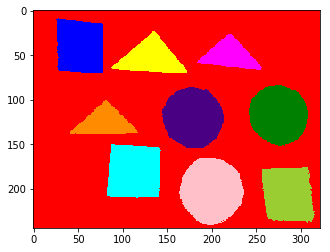

In [16]:
label_image=ski.measure.label(ICD)
plt.imshow(ski.color.label2rgb(label_image))
plt.show()

area 52836
bbox (0, 0, 244, 322)
bbox_area 78568
centroid (116.01474373533198, 151.94479143008556)
convex_area 78568
convex_image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
coords [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [243 319]
 [243 320]
 [243 321]]
eccentricity 0.6962732065160528
equivalent_diameter 259.37016903573755
euler_number -8
extent 0.672487526728439
filled_area 78568
filled_image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  Tru

/usr/local/lib/python3.6/dist-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/usr/local/lib/python3.6/dist-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


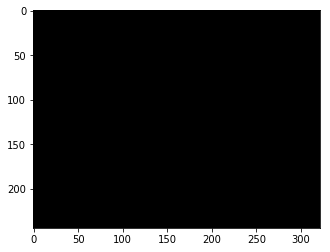

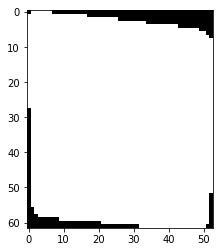

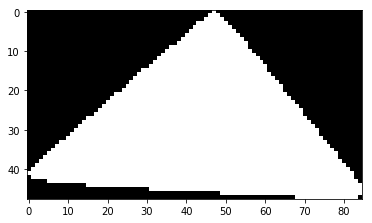

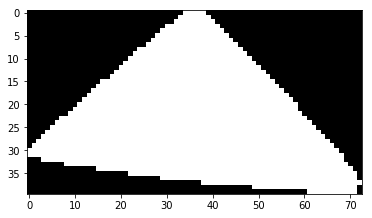

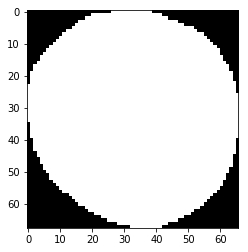

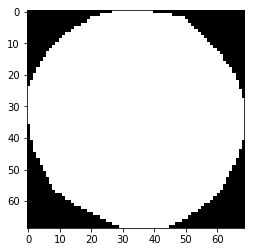

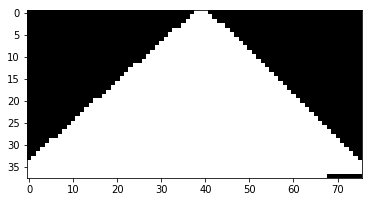

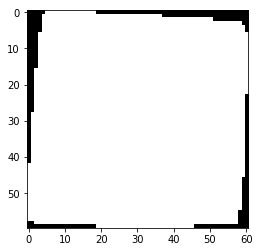

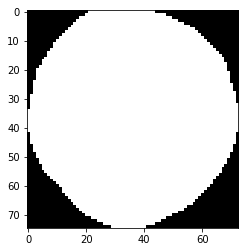

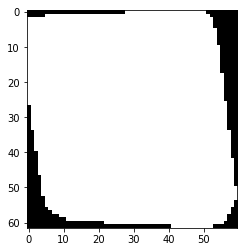

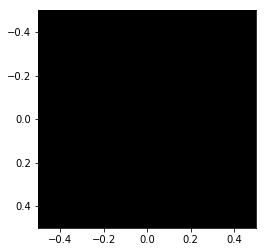

FileNotFoundError: ignored

In [17]:
regions = ski.measure.regionprops(label_image)
for prop in regions[0]:
    print(prop,regions[0][prop])

    
for region in regions:
    plt.imshow(region.convex_image,cmap='gray')
    plt.show()

regions.pop(0)
regions.pop(9)

for num,region in enumerate(regions):
    
    #arreglo vacio 
    img = np.empty(region.convex_image.shape,dtype=np.uint8)
    
    for i in range(region.convex_image.shape[0]):
        for j in range(region.convex_image.shape[1]):
            
            #imagen binarizada
            if region.convex_image[i,j]:
                img[i,j] = 255
            else:
                img[i,j] = 0
                
    io.imsave('imagenes/forma/train/Fig{0}.jpg'.format(num+1),img)




In [18]:
regions.pop(0)
regions.pop(9)
for num,region in enumerate(regions):
    
    #arreglo vacio con las dimensiones de la región
    img = np.empty(region.convex_image.shape,dtype=np.uint8)
    
    for i in range(region.convex_image.shape[0]):
        for j in range(region.convex_image.shape[1]):
            
            #imagen binarizada
            if region.convex_image[i,j]:
                img[i,j] = 255
            else:
                img[i,j] = 0
                
    io.imsave('imagenes/forma/train/Fig{0}.jpg'.format(num+1),img)

IndexError: ignored

In [0]:
for num,region in enumerate(regions):    
    
    img = io.imread(figuras)
    #el centroide de la región (figura) es el dato del cual sacamos el color
    color = img[int(region.centroid[0]),int(region.centroid[1])]
    #identificar la región de la imagen original
    img = img[region.bbox[0]:region.bbox[2],region.bbox[1]:region.bbox[3]]
    
    for i in range(region.convex_image.shape[0]):
        for j in range(region.convex_image.shape[1]):
            if region.convex_image[i,j]:
                img[i,j] = color
            else:
                img[i,j] = [255,255,255]
                
    io.imsave('imagenes/color/train/Fig{0}.jpg'.format(num+1),img)

In [0]:
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing)
    label_image=ski.measure.label(Uing)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

In [0]:
def get_figure_color(img):
    dims = img.shape
    r,g,b = img[dims[0]//2,dims[1]//2]
    return r,g,b

In [0]:
def Lector_forma(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath).convert('L')
            Train_data.append(hu_Characteristics(np.array(img))) 
        except :
            print("file error: "+img)
        
    return np.array(Train_data),Tags

In [0]:
X_train,y_train=Lector_forma("imagenes/forma/train/","train_forma.json")

In [0]:
X_train

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [0]:
clforma = MLPClassifier(solver='lbfgs', alpha=1e-2,
                  hidden_layer_sizes=(10, 3))

In [0]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [0]:
clforma.fit(X_train,y_train)

In [0]:
pred = clforma.predict(X_train)
print(pred)

In [0]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_train)
print(predclass)
print(yclass)

In [0]:
print(accuracy_score(predclass,yclass))

In [0]:
print(confusion_matrix(predclass,yclass))

In [0]:
from sklearn.externals import joblib
filename = 'clforma_model.sav'
joblib.dump(clforma, filename)

In [0]:
loaded_model = joblib.load(filename)

In [0]:
load_predict=loaded_model.predict(X_train)

In [0]:
ClassDetector(load_predict)

In [0]:
def Lector_color(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath)
            Train_data.append(get_figure_color(np.array(img))) 
        except :
            print("file error: "+img)
        
    return np.array(Train_data),Tags

In [0]:
X_train,y_train=Lector_color("imagenes/color/train/","train_color.json")

In [0]:
X_train

In [0]:
clcolor = MLPClassifier(solver='lbfgs', alpha=1e-2,
                  hidden_layer_sizes=(10, 3)

In [0]:
clcolor.fit(X_train,y_train)

In [0]:
pred = clcolor.predict(X_train)
print(pred)

In [0]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_train)
print(predclass)
print(yclass)

In [0]:
print(accuracy_score(predclass,yclass))

In [0]:
print(confusion_matrix(predclass,yclass))

In [0]:
filename = 'clcolor_model.sav'
joblib.dump(clcolor, filename)

In [0]:
loaded_model = joblib.load(filename)

In [0]:
load_predict=loaded_model.predict(X_train)

In [0]:
ClassDetector(load_predict)